# About this Sprint
## The purpose of this Sprint
<li> Understand SVM through scratch </li>
<li> Touch a method different from the linear model </li>

## How to learn
<li>After implementing SVM with scratch, we will train and verify.

# SVM scratch

We will create a class of support vector machine (SVM, support vector machine) for classification by scratch. We will implement the algorithm using only the minimum library such as NumPy.


There are soft margin SVMs that allow classification errors during learning and hard margin SVMs that do not, but here we will deal with hard margin SVMs that are simple to implement.


The template is prepared below. Add some code to this ScratchSVMClassifier class.

### Prototy
```
class ScratchSVMClassifier():
    """
    Scratch implementation of SVM classifier
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    kernel : str
      Kernel type. Linear kernel (linear) or polynomial kernel (polly)
    threshold : float
      Threshold for choosing a support vector
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.n_support_vectors : int
      Number of support vectors
    self.index_support_vectors : The following form of ndarray, shape (n_support_vectors,)
      Support vector index
    self.X_sv :  The following forms of ndarray, shape (n_support_vectors, n_features)
      Support vector features
    self.lam_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector undetermined multiplier
    self.y_sv :  The following forms of ndarray, shape (n_support_vectors, 1)
      Support vector label
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn the SVM classifier. If verification data is input, the accuracy for it is also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass
    def predict(self, X):
        """
        Estimate the label using the SVM classifier.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by SVM classifier
        """
        pass
        return
```

In [4]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self,
                 num_iter=5000,
                 lr=1e-2,
                 kernel='liner',
                 d=1,
                 threshold=1e-5,
                 verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.d = d
        self.threshold = threshold
        self.verbose = verbose

    # 線形カーネル
    def _liner_kernel(self, X, i, j):
        return X[i].T @ X[j]

    # 多項式カーネル
    def _polynomial_kernel(self, X, i, j):
        return (1 * (X[i].T @ X[j]) + 0)**self.d

    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        self.lamda = np.random.rand(X.shape[0])

        # カーネル設定
        if self.kernel == 'liner':
            kernel = self._liner_kernel
        if self.kernel == 'polynomial':
            kernel = self._polynomial_kernel

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            for k in range(self.iter):
                self._gradieny_ascent(X, y, kernel)
                print('---------------------------------------')
                print('n_iter:', k, 'lamda:', self.lamda)
        for k in range(self.iter):
            self._gradieny_ascent(X, y, kernel)

        # サポートベクターの選定
        self.index_support_vectors = np.where(self.lamda > self.threshold)
        self.n_support_vectors = len(X[self.index_support_vectors])
        self.X_sv = X[self.index_support_vectors]
        self.lam_sv = self.lamda[self.index_support_vectors]
        self.y_sv = y[self.index_support_vectors]
        print('閾値：', self.threshold)
        print('サポートベクター（候補）: 個数', self.n_support_vectors, '\n',
              X[self.index_support_vectors])

    def _gradieny_ascent(self, X, y, kernel):
        lamda = self.lamda
        #lamda_list = np.array([])
        for i in range(len(X)):
            discent = 0
            for j in range(len(X)):
                discent += self.lamda[j] * y[i] * y[j] * kernel(X, i, j)
            #lamda_list = np.append(lamda_list, discent)
            discent = lamda[i] + self.lr * (1 - discent)
            self.lamda[i] = np.maximum(0, discent)

        #self.lamda = lamda + self.lr * (1 - lamda_list)

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        x = X
        N = self.n_support_vectors
        n = self.index_support_vectors
        lamda_n = self.lam_sv
        ysv_n = self.y_sv
        s_n = self.X_sv
        if self.kernel == 'liner':
            pred_kernel = x @ s_n.T
        if self.kernel == 'polynomial':
            pred_kernel = (1 * (x @ s_n.T) + 0)**self.d

        # 推定開始
        pred_y = lamda_n * ysv_n * pred_kernel
        pred_y = np.sum(pred_y, axis=1)
        pred_y = pred_y / abs(pred_y)
        pred_y = pred_y.astype(int)

        return pred_y

## Problem 1: Lagrange's steepest descent by the undetermined multiplier method
Lagrange's undetermined multiplier method is used for SVM learning. Prepare Lagrange multiplier $\lambda$ for the number of samples and update it by the following formula. Implement the method that performs this calculation in the ScratchSVMClassifier class
 
<center> $\lambda_{i}^{new} = \lambda_{i} + \alpha ( 1 - \sum_{j=1}^{n} \lambda_{j} y_{i} y_{j} k(x_i, x_j))$ </center>

Where $k(x_i, x_j)$ is a kernel function. For a linear kernel: Let's leave this part as an independent method so that it can correspond to other kernel functions.

<center> $ k 
 ( 
 x 
 i 
 , 
 x 
 j 
 ) 
 = 
 x 
 T 
 i 
 x 
 j $ </center>
 
As a condition, $\lambda_i >= 0$ must be satisfied for each update. If not, set $\lambda_i = 0$.
 
$i, j$: sample index
 
$\lambda_i^{new}$: Lagrange multiplier for i-th sample after update

$\lambda_i$: Lagrange multiplier of i-th sample before update

$\alpha$: learning rate

$\lambda_j$: Lagrange multiplier for the jth sample

$y_i$: Label for i-th sample

$y_j$: Label for the jth sample

$x_i$: Feature vector of i-th sample

$x_j$: Feature vector of jth sample

You will be calculating the relationship for one sample with all the samples.

## Problem 2: Support vector determination
A sample whose calculated Lagrange multiplier $ \lambda $ is larger than the Settings threshold is treated as a support vector. You will need a support vector when estimating. Write the code to determine the support vector and keep it as an instance variable.


The threshold is a hyperparameter, but it is a good idea to start with about 1e-5. If you can output the number of support vectors, you can check whether the learning is done well.

## Problem 3: Estimated
At the time of estimation, the features of the data to be estimated and the features of the support vector are calculated using a kernel function. The sign of $f(x)$ obtained is the classification result.

<center> $f(x) = \sum_{n=1}^{N} \lambda_n y_{sv - n} k (x , s_{n})  $ </center>

$x$: Feature vector of the data to be estimated

$N$: Number of support vectors

$n$: Index of support vector

$\lambda$: Lagrange multiplier of $n$th support vector

$y_{sv_n}$: Label of the $n$th support vector

$k()$: kernel function

$s_n$: Features of the $n$th support vector



## Problem 4: Learning and estimation

Learn and estimate the scratch implementation for the binary classification of Simple Dataset 1 prepared in the Sprint, an introduction to machine learning scratch.


Compare this with the scikit-learn implementation and see if it works correctly.


Use scikit-learn for indicator values such as Accuracy, Precision and Recall.

In [1]:
import numpy as np
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [9]:
my_model = ScratchSVMClassifier(num_iter=100)
my_model.fit(X_train_std,y_train)

閾値： 1e-05
サポートベクター（候補）: 個数 17 
 [[-0.37060883  0.62430785]
 [-0.81775108 -0.15570185]
 [-0.09701666  0.70351894]
 [-1.77417276 -0.67986094]
 [ 1.24348294  0.19491912]
 [ 0.4069769  -0.5096052 ]
 [-0.01061247  0.87274889]
 [-0.89308889  0.1467678 ]
 [-0.19335578  0.61634472]
 [ 0.10226235 -0.66375442]
 [-1.25538473 -0.3830576 ]
 [-0.35760544  0.65776582]
 [ 0.45178726 -0.69761127]
 [ 0.34320208 -0.64437254]
 [-0.33279451  0.75144966]
 [-1.58841606 -0.46007424]
 [ 0.27628067 -0.67766804]]


In [10]:
y_pred = my_model.predict(X_test_std)
y_pred

array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1])

#### Evaluation

In [11]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
f1 = metrics.f1_score(y_test,y_pred)
confusion = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1",f1)

Accuracy 1.0
Precision 1.0
Recall 1.0
F1 1.0


## Problem 5: Visualization of decision area
Visualise the decision area.


Show support vectors in different colors as in the example below

![draw](decisionarea.png "Boundary")

In [12]:

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 決定領域を可視化する関数
def decision_region(X, y, model, sup_v, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.rcParams['font.size'] = 10
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    plt.scatter(sup_v[:, 0], sup_v[:, 1], color='yellow', label='support_vector')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

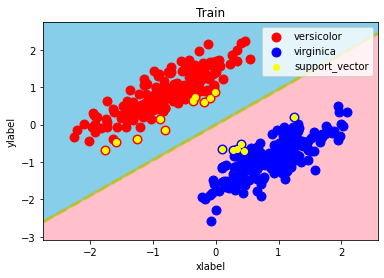

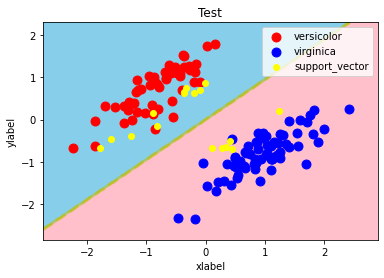

In [15]:
decision_region(X_train_std,y_train,my_model,my_model.X_sv,title="Train")
decision_region(X_test_std,y_test,my_model,my_model.X_sv,title="Test")

# How does SVM work?
That's all the information you need to implement scratches, but here's a rough explanation of how it works.


SVM is a method of maximizing the distance (margin) between a decision boundary and a nearby point. If there are two features, consider drawing a line as shown in the figure below.

## Problem 6: (Advance task) Creation of polynomial kernel function

In [17]:
new_model = ScratchSVMClassifier(num_iter=100,kernel='polynomial')

In [18]:
new_model.fit(X_test_std,y_train)

閾値： 1e-05
サポートベクター（候補）: 個数 125 
 [[ 0.84944865 -1.01790037]
 [ 0.95810924 -0.38909143]
 [-1.14289485  0.69137425]
 [-0.61258127  1.20273841]
 [-0.17254042 -2.33592649]
 [ 1.0207404  -0.38144938]
 [ 0.55295244 -1.31064422]
 [-0.09499488  0.87805873]
 [-0.27731864  1.27082189]
 [-0.39990605  0.69997477]
 [ 1.54172497 -0.31095501]
 [ 0.01982657  1.74675373]
 [-1.17464404  0.64983646]
 [-0.47852696  1.11090573]
 [ 1.99527317 -0.21116838]
 [-0.8754777   1.01476978]
 [ 1.41612073 -0.02822828]
 [ 0.71300285 -0.62726866]
 [-1.08860777  0.71087063]
 [-1.8618011  -0.62920806]
 [ 0.87974094 -0.70189508]
 [ 1.25826898 -0.90963368]
 [ 1.01547231 -0.82784278]
 [ 1.2633653  -0.32867501]
 [-0.51744685  1.24873361]
 [ 1.75520423  0.11034103]
 [-0.35880826  1.23569013]
 [ 1.69078928 -1.04229667]
 [-0.66438691  0.97136402]
 [-1.29821046  0.41696234]
 [-0.68533429  1.11168622]
 [ 0.36537244 -1.05177957]
 [-0.18160994  1.11673132]
 [ 1.40333312 -0.64942725]
 [ 0.50116879 -0.89952075]
 [-0.20180011  0.89198

In [20]:
y_pred = new_model.predict(X_test_std)

In [21]:
new_accuracy = metrics.accuracy_score(y_test,y_pred)
new_precision = metrics.precision_score(y_test,y_pred)
new_recall = metrics.recall_score(y_test,y_pred)
new_f1 = metrics.f1_score(y_test,y_pred)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)
print("F1",f1)

Accuracy 1.0
Precision 1.0
Recall 1.0
F1 1.0


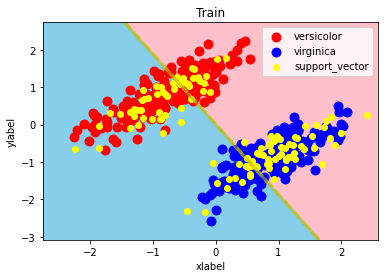

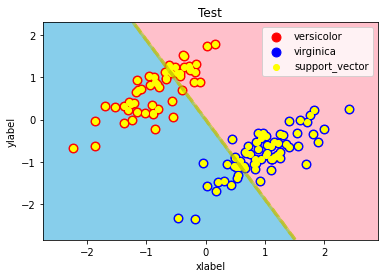

In [22]:
decision_region(X_train_std,
                y_train,
                new_model,
                new_model.X_sv,
                title="Train")

decision_region(X_test_std,
                y_test,
                new_model,
                new_model.X_sv,
                title="Test")